DATASET:
https://www.kaggle.com/datasets/S%C3%ADrio-Libanes/covid19


# **Random Forest**

## Loading Packages


In [ ]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
install.packages("caTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [ ]:
data<- read.csv("/content/Kaggle_Sirio_Libanes_ICU_Prediction.csv")
head(data)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE.GROUPING.1,DISEASE.GROUPING.2,DISEASE.GROUPING.3,DISEASE.GROUPING.4,DISEASE.GROUPING.5,DISEASE.GROUPING.6,⋯,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,COVID
,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,0,1,60th,0,0,0,0,0,1,1,⋯,-1.0000000,-1.0000000,-1.0000000,-1.000000,-1.0000000,-1.00000000,-1.0000000,-1.000000,0-2,0
2,0,1,60th,0,0,0,0,0,1,1,⋯,-1.0000000,-1.0000000,-1.0000000,-1.000000,-1.0000000,-1.00000000,-1.0000000,-1.000000,02-Apr,0
3,0,1,60th,0,0,0,0,0,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,04-Jun,0
4,0,1,60th,0,0,0,0,0,1,1,⋯,-1.0000000,-1.0000000,NA,NA,NA,NA,-1.0000000,-1.000000,06-Dec,0
5,0,1,60th,0,0,0,0,0,1,1,⋯,-0.2380952,-0.8181818,-0.3899666,0.407558,-0.2304616,0.09677419,-0.2422815,-0.814433,ABOVE_12,1
6,1,1,90th,1,0,0,0,0,0,0,⋯,-1.0000000,-1.0000000,-1.0000000,-1.000000,-1.0000000,-1.00000000,-1.0000000,-1.000000,0-2,1


In [ ]:
library("randomForest")
library("caret")
library("caTools")

## Preprocessing Data

In [ ]:
# Imputation of multiple columns (i.e. the whole data frame)

for(i in 1:ncol(data)) {
  data[ , i][is.na(data[ , i])] <- median(data[ , i], na.rm = TRUE)
}
head(data)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE.GROUPING.1,DISEASE.GROUPING.2,DISEASE.GROUPING.3,DISEASE.GROUPING.4,DISEASE.GROUPING.5,DISEASE.GROUPING.6,⋯,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,COVID
,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,0,1,60th,0,0,0,0,0,1,1,⋯,-1.0000000,-1.0000000,-1.0000000,-1.0000000,-1.0000000,-1.00000000,-1.0000000,-1.0000000,0-2,0
2,0,1,60th,0,0,0,0,0,1,1,⋯,-1.0000000,-1.0000000,-1.0000000,-1.0000000,-1.0000000,-1.00000000,-1.0000000,-1.0000000,02-Apr,0
3,0,1,60th,0,0,0,0,0,1,1,⋯,-0.9761905,-0.9797980,-1.0000000,-0.9849437,-0.9898219,-1.00000000,-0.9759244,-0.9803331,04-Jun,0
4,0,1,60th,0,0,0,0,0,1,1,⋯,-1.0000000,-1.0000000,-1.0000000,-0.9849437,-0.9898219,-1.00000000,-1.0000000,-1.0000000,06-Dec,0
5,0,1,60th,0,0,0,0,0,1,1,⋯,-0.2380952,-0.8181818,-0.3899666,0.4075580,-0.2304616,0.09677419,-0.2422815,-0.8144330,ABOVE_12,1
6,1,1,90th,1,0,0,0,0,0,0,⋯,-1.0000000,-1.0000000,-1.0000000,-1.0000000,-1.0000000,-1.00000000,-1.0000000,-1.0000000,0-2,1


In [ ]:
s <- seq(15,190,by = 5)
patdata <- subset(data, select = c(2,4,5:13,s,194:199,231))
head(patdata)

,AGE_ABOVE65,GENDER,DISEASE.GROUPING.1,DISEASE.GROUPING.2,DISEASE.GROUPING.3,DISEASE.GROUPING.4,DISEASE.GROUPING.5,DISEASE.GROUPING.6,HTN,IMMUNOCOMPROMISED,⋯,TTPA_MEAN,UREA_MEAN,DIMER_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,COVID
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,0,0,0,0,0,1,1,0,0,⋯,-0.8466329,-0.8746988,-0.9780288,0.08641975,-0.23076923,-0.2830189,-0.5932203,-0.28571429,0.7368421,0
2,1,0,0,0,0,0,1,1,0,0,⋯,-0.8466329,-0.8746988,-0.9780288,0.33333333,-0.23076923,-0.1320755,-0.5932203,0.53571429,0.5789474,0
3,1,0,0,0,0,0,1,1,0,0,⋯,-0.8256131,-0.8361446,-0.9949119,-0.10017217,-0.37440476,-0.2830189,-0.5028249,0.03571429,0.7368421,0
4,1,0,0,0,0,0,1,1,0,0,⋯,-0.8466329,-0.8746988,-0.9780288,-0.10017217,-0.37440476,-0.2830189,-0.5028249,-0.10714286,0.7368421,0
5,1,0,0,0,0,0,1,1,0,0,⋯,-0.8466329,-0.8361446,-0.9967621,-0.24302135,-0.33853733,-0.2130310,-0.3178592,0.03377903,0.6659321,1
6,1,1,0,0,0,0,0,0,1,1,⋯,-0.8466329,-0.8746988,-0.9780288,-0.28395062,-0.04615385,0.1886792,0.8305085,-0.10714286,1.0000000,1


In [ ]:
colnames(patdata)

[1] "AGE_ABOVE65"                  "GENDER"                      
 [3] "DISEASE.GROUPING.1"           "DISEASE.GROUPING.2"          
 [5] "DISEASE.GROUPING.3"           "DISEASE.GROUPING.4"          
 [7] "DISEASE.GROUPING.5"           "DISEASE.GROUPING.6"          
 [9] "HTN"                          "IMMUNOCOMPROMISED"           
[11] "OTHER"                        "ALBUMIN_MEAN"                
[13] "BE_ARTERIAL_MEAN"             "BE_VENOUS_MEAN"              
[15] "BIC_ARTERIAL_MEAN"            "BIC_VENOUS_MEAN"             
[17] "BILLIRUBIN_MEAN"              "BLAST_MEAN"                  
[19] "CALCIUM_MEAN"                 "CREATININ_MEAN"              
[21] "FFA_MEAN"                     "GGT_MEAN"                    
[23] "GLUCOSE_MEAN"                 "HEMATOCRITE_MEAN"            
[25] "HEMOGLOBIN_MEAN"              "INR_MEAN"                    
[27] "LACTATE_MEAN"                 "LEUKOCYTES_MEAN"             
[29] "LINFOCITOS_MEAN"              "NEUTROPHILES_MEAN"           
[31] "P02_ARTERIAL_MEAN"            "P02_VENOUS_MEAN"             
[33] "PC02_ARTERIAL_MEAN"           "PC02_VENOUS_MEAN"            
[35] "PCR_MEAN"                     "PH_ARTERIAL_MEAN"            
[37] "PH_VENOUS_MEAN"               "PLATELETS_MEAN"              
[39] "POTASSIUM_MEAN"               "SAT02_ARTERIAL_MEAN"         
[41] "SAT02_VENOUS_MEAN"            "SODIUM_MEAN"                 
[43] "TGO_MEAN"                     "TGP_MEAN"                    
[45] "TTPA_MEAN"                    "UREA_MEAN"                   
[47] "DIMER_MEAN"                   "BLOODPRESSURE_DIASTOLIC_MEAN"
[49] "BLOODPRESSURE_SISTOLIC_MEAN"  "HEART_RATE_MEAN"             
[51] "RESPIRATORY_RATE_MEAN"        "TEMPERATURE_MEAN"            
[53] "OXYGEN_SATURATION_MEAN"       "COVID"

In [ ]:
n <- patdata[,c(1:11,54)]
cn <- colnames(n)
patdata[cn] <- lapply(patdata[cn], factor)
str(patdata)

'data.frame':	1925 obs. of  54 variables:
 $ AGE_ABOVE65                 : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ GENDER                      : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 2 2 2 ...
 $ DISEASE.GROUPING.1          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ DISEASE.GROUPING.2          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ DISEASE.GROUPING.3          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ DISEASE.GROUPING.4          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ DISEASE.GROUPING.5          : Factor w/ 2 levels "0","1": 2 2 2 2 2 1 1 1 1 2 ...
 $ DISEASE.GROUPING.6          : Factor w/ 2 levels "0","1": 2 2 2 2 2 1 1 1 1 1 ...
 $ HTN                         : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 2 2 2 ...
 $ IMMUNOCOMPROMISED           : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 2 2 2 ...
 $ OTHER                       : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ ALBUMIN_MEAN        

## Splitting Data

In [ ]:
split <- sample.split(patdata, SplitRatio = 0.8)
train_reg <- subset(patdata, split == "TRUE")
test_reg <- subset(patdata, split == "FALSE")
print(head(train_reg,5))
print(head(test_reg,5))

  AGE_ABOVE65 GENDER DISEASE.GROUPING.1 DISEASE.GROUPING.2 DISEASE.GROUPING.3
1           1      0                  0                  0                  0
2           1      0                  0                  0                  0
3           1      0                  0                  0                  0
6           1      1                  0                  0                  0
7           1      1                  0                  0                  0
  DISEASE.GROUPING.4 DISEASE.GROUPING.5 DISEASE.GROUPING.6 HTN
1                  0                  1                  1   0
2                  0                  1                  1   0
3                  0                  1                  1   0
6                  0                  0                  0   1
7                  0                  0                  0   1
  IMMUNOCOMPROMISED OTHER ALBUMIN_MEAN BE_ARTERIAL_MEAN BE_VENOUS_MEAN
1                 0     1    0.6052632               -1             -1
2           

## Model Building

In [ ]:
model_randomforest <- randomForest(COVID ~ ., data= train_reg, ntree = 200)

In [ ]:
model_ypredict <- predict(model_randomforest,test_reg)

In [ ]:
cm_model <- table(test_reg$COVID, model_ypredict)
cm_model

   model_ypredict
      0   1
  0 275  11
  1  37  71

In [ ]:
confusionMatrix(cm_model)

Confusion Matrix and Statistics

   model_ypredict
      0   1
  0 275  11
  1  37  71
                                          
               Accuracy : 0.8782          
                 95% CI : (0.8417, 0.9088)
    No Information Rate : 0.7919          
    P-Value [Acc > NIR] : 5.267e-06       
                                          
                  Kappa : 0.6691          
                                          
 Mcnemar's Test P-Value : 0.000308        
                                          
            Sensitivity : 0.8814          
            Specificity : 0.8659          
         Pos Pred Value : 0.9615          
         Neg Pred Value : 0.6574          
             Prevalence : 0.7919          
         Detection Rate : 0.6980          
   Detection Prevalence : 0.7259          
      Balanced Accuracy : 0.8736          
                                          
       'Positive' Class : 0               
                                          

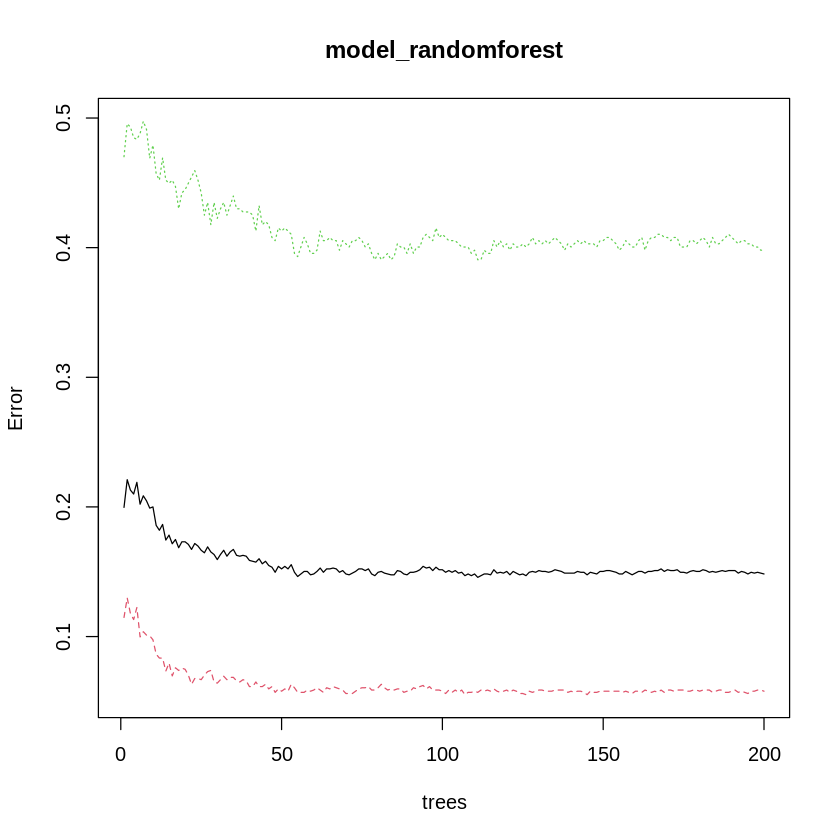

In [ ]:
plot(model_randomforest)

In [ ]:
classerror_model <- mean(model_ypredict != test_reg$COVID)
print(paste("Accuracy Random Forest Classifier with ntree=200 (in %) = ", (1 - classerror_model)*100))
acc_model <- (1 - classerror_model)*100

[1] "Accuracy Random Forest Classifier with ntree=200 (in %) =  87.8172588832487"
